In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('Crime Prediction in Chicago_Dataset.csv')

In [ ]:
df.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,12888104,JF469015,11/10/2022 3:47,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,13209277,JG422539,8/15/2022 9:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN
5,12622465,JF149923,2/19/2022 10:36,010XX N FRANCISCO AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,HOSPITAL BUILDING / GROUNDS,True,True,...,26.0,24,08B,1156861.0,1906972.0,2022,9/15/2023 15:41,41.900506,-87.699285,"(41.900505589, -87.699285044)"
6,12640859,JF172230,3/13/2022 5:15,012XX W PRATT BLVD,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,...,49.0,1,08B,1166646.0,1945317.0,2022,9/15/2023 15:41,42.005522,-87.662241,"(42.00552183, -87.662241448)"
7,12667337,JF203985,4/10/2022 21:38,011XX N CHERRY AVE,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,WAREHOUSE,True,True,...,27.0,8,26,1169620.0,1907431.0,2022,9/15/2023 15:41,41.901497,-87.652407,"(41.901496787, -87.652407386)"
8,12671049,JF208259,4/14/2022 22:10,003XX E OHIO ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,VEHICLE - COMMERCIAL,True,True,...,2.0,8,08B,1178915.0,1904276.0,2022,9/15/2023 15:41,41.892632,-87.618363,"(41.892631803, -87.618362824)"
9,12678035,JF216671,4/22/2022 23:30,044XX N BROADWAY,810,THEFT,OVER $500,APARTMENT,True,True,...,46.0,3,6,1168614.0,1929562.0,2022,9/15/2023 15:41,41.962247,-87.655460,"(41.962247182, -87.6554598)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

In [ ]:
df.shape

(239558, 22)

In [ ]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.395580e+05,239558.000000,239558.00000,239548.000000,239558.000000,2.348910e+05,2.348910e+05,239558.0,234891.000000,234891.000000
mean,1.273144e+07,1154.023276,11.31053,23.385029,36.268474,1.165381e+06,1.887038e+06,2022.0,41.845612,-87.668599
std,7.082019e+05,707.909870,7.07555,14.210565,21.553814,1.679375e+04,3.229564e+04,0.0,0.088833,0.061010
min,2.654300e+04,111.000000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00,2022.0,36.619446,-91.686566
25%,1.267802e+07,533.000000,5.00000,9.000000,22.000000,1.153949e+06,1.859284e+06,2022.0,41.769168,-87.710150
50%,1.276893e+07,1033.000000,10.00000,24.000000,32.000000,1.167256e+06,1.893383e+06,2022.0,41.863073,-87.661465
75%,1.285704e+07,1731.000000,17.00000,35.000000,53.000000,1.176856e+06,1.910066e+06,2022.0,41.909023,-87.626402
max,1.363051e+07,2535.000000,31.00000,50.000000,77.000000,1.205119e+06,1.951493e+06,2022.0,42.022548,-87.524532


In [ ]:
df.isnull().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,965
Arrest,0
Domestic,0


<Axes: >

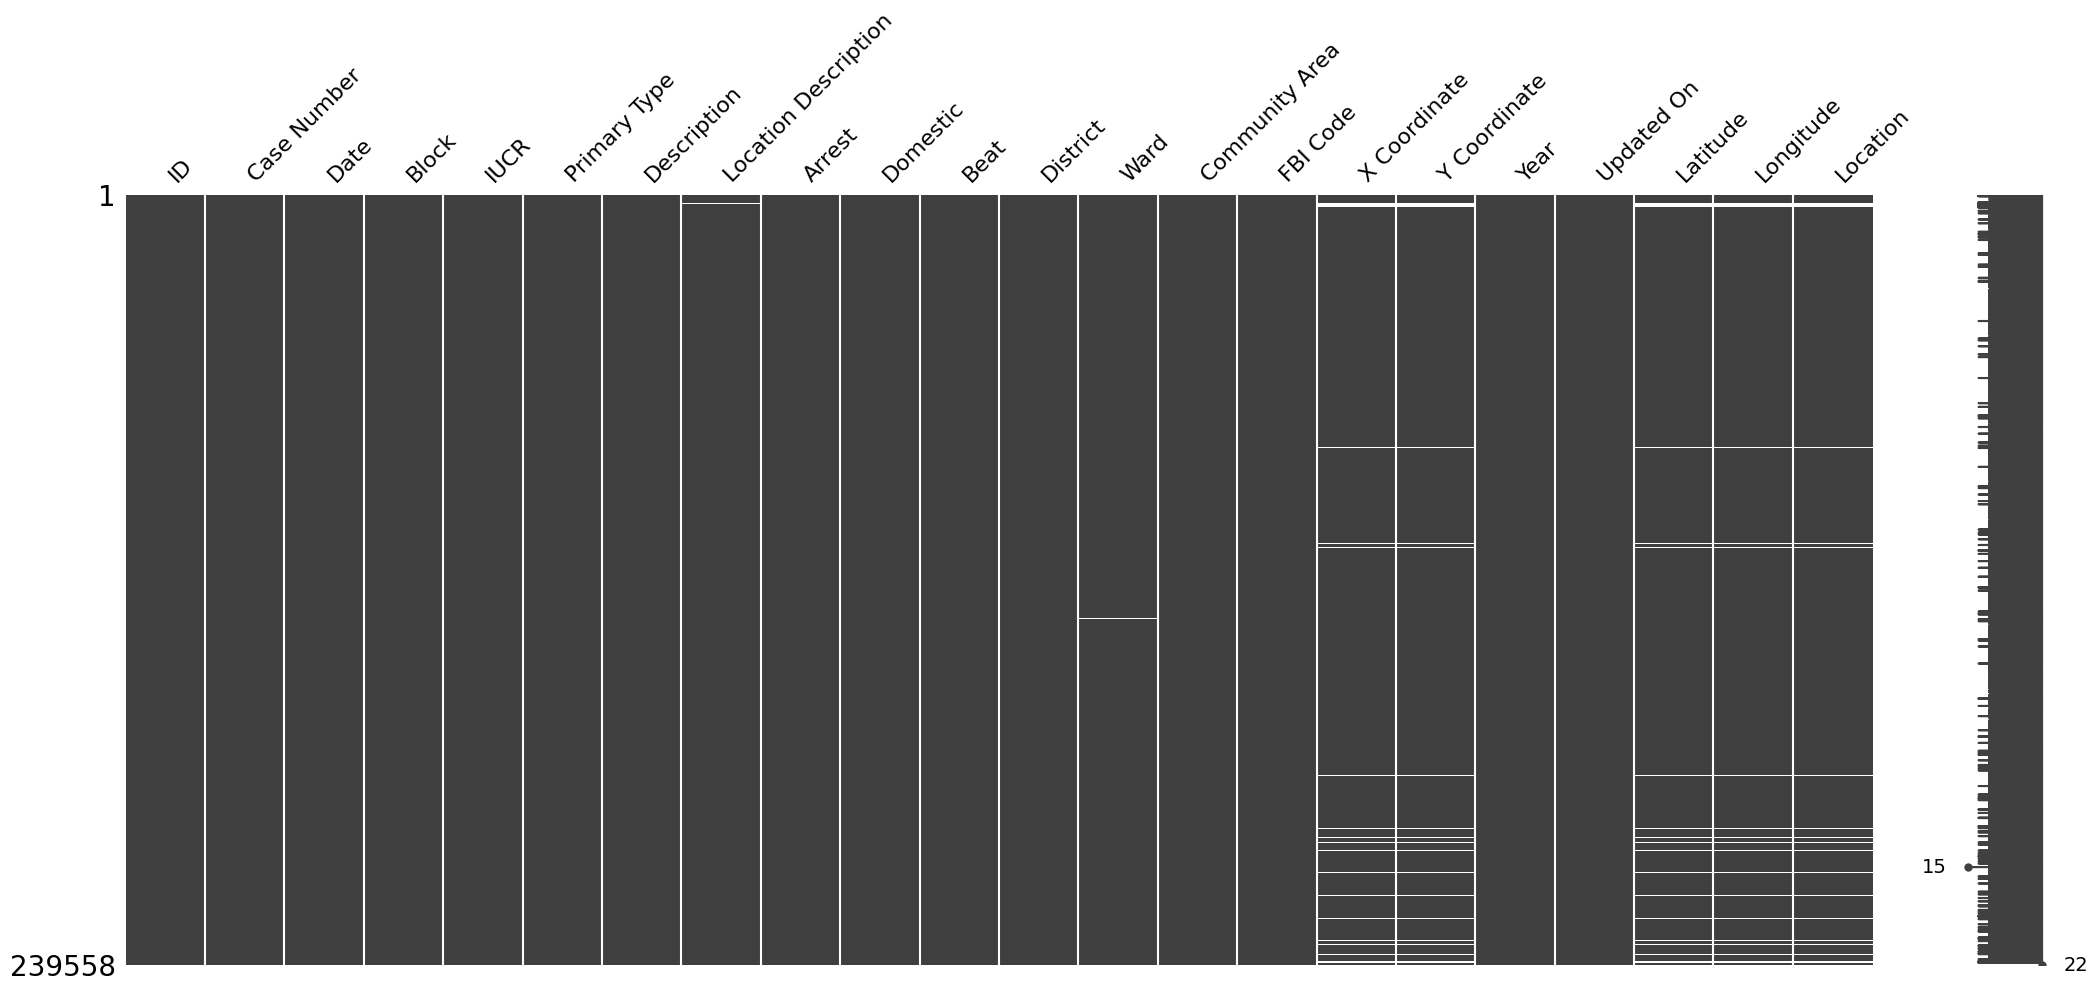

In [ ]:
msno.matrix(df)

In [ ]:
df.duplicated().sum()

0

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

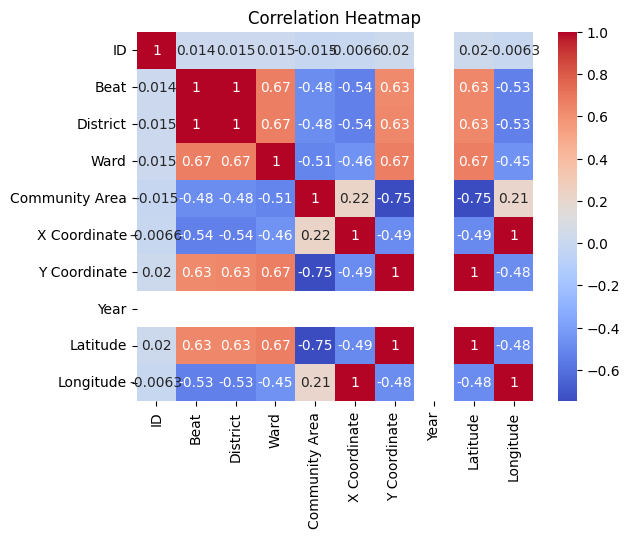

In [ ]:
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df['Location Description'].fillna(df['Location Description'].mode()[0], inplace=True)

In [ ]:
from textwrap import fill
def fill_nan_with_group_mode (dataframe, group_cols, target_col):
  dataframe[target_col] = dataframe.groupby(group_cols)[target_col].transform(lambda x: x.fillna(x.mode()[0]))

fill_nan_with_group_mode(df, ['Beat','District'], 'Ward')

In [ ]:
df.dropna(subset=['X Coordinate'], inplace=True)

In [ ]:
df.isna().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,0
Arrest,0
Domestic,0


In [ ]:
df['Hour_of_Day'] = pd.to_datetime(df['Date']).dt.hour
def categorize_time(hour):
  if hour<6:
    return 'Night'
  elif hour < 12:
    return 'Morning'
  elif hour < 18:
    return 'Afternoon'
  else:
    return 'Evening'
df['Time_of_Day'] = df['Hour_of_Day'].apply(categorize_time)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.day_name()

In [ ]:
df["Is_Weekend"] = df["Day_of_Week"].apply(lambda x:"Weekend" if x in ["Saturday", "Sunday"] else "Weekday")

In [ ]:
df['Month_of_year'] = df['Date'].dt.month_name()

In [ ]:
def splitBlock(x):
    x = x.split(" ")
    x = x[1:]
    return " ".join(x[0:])
df.Block = df.Block.apply(splitBlock)

In [ ]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Hour_of_Day', 'Time_of_Day', 'Day_of_Week', 'Is_Weekend',
       'Month_of_year'],
      dtype='object')

In [ ]:
df.drop(columns=['ID', 'Case Number', 'X Coordinate', 'Y Coordinate', 'Location', 'Updated On'], inplace=True)
df.drop('Date', axis=1, inplace=True)

In [ ]:
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Hour_of_Day,Time_of_Day,Day_of_Week,Is_Weekend,Month_of_year
0,S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,724,7,16.0,68,26,2022,41.771782,-87.649437,15,Afternoon,Friday,Weekday,January
1,S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,324,3,5.0,69,17,2022,41.763338,-87.597001,21,Evening,Friday,Weekday,August
2,W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1621,16,39.0,11,17,2022,41.985875,-87.766404,14,Afternoon,Sunday,Weekend,August
3,S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,733,7,17.0,68,15,2022,41.762615,-87.652840,3,Night,Thursday,Weekday,November
5,N FRANCISCO AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,HOSPITAL BUILDING / GROUNDS,True,True,1211,12,26.0,24,08B,2022,41.900506,-87.699285,10,Morning,Saturday,Weekend,February


In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

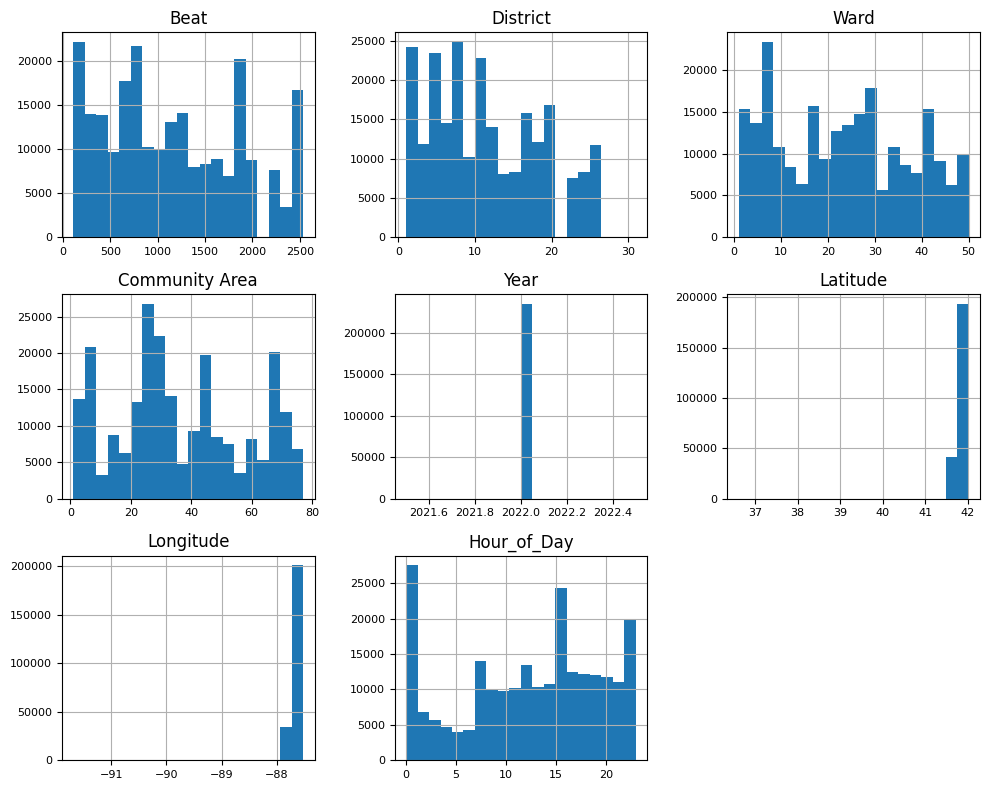

In [ ]:
df[num_cols].hist(figsize=(10, 8), bins=20, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.xlabel('Value', fontsize=10 , rotation=45)
plt.ylabel('Frequency', fontsize=10)
plt.show()

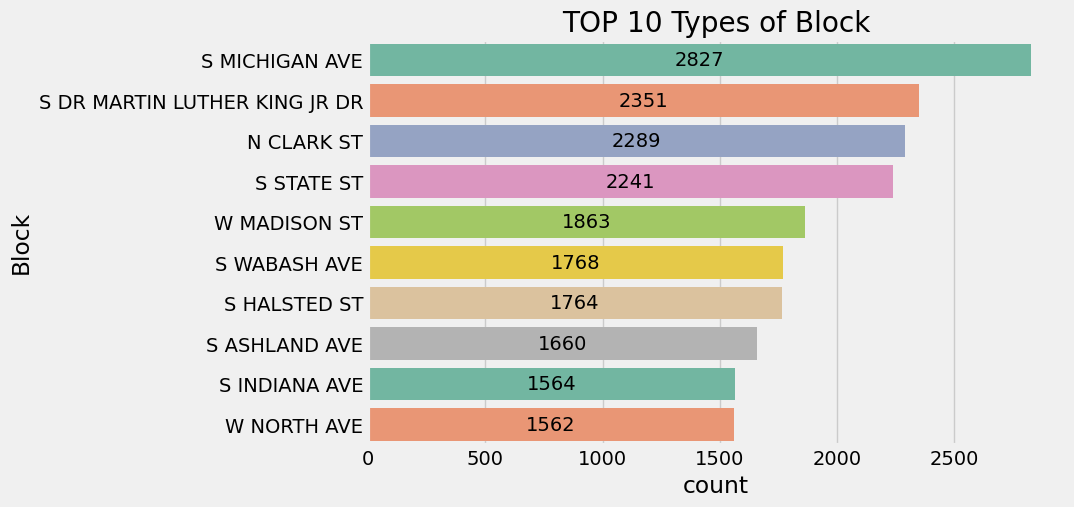

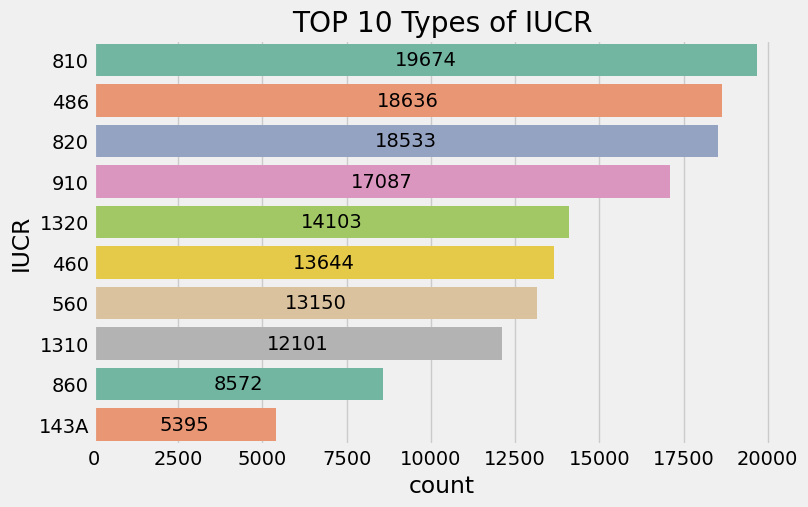

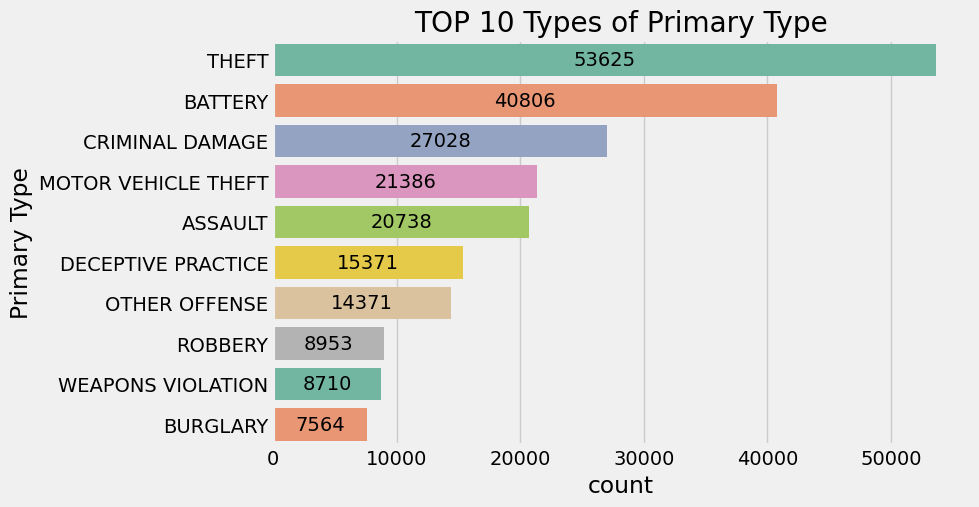

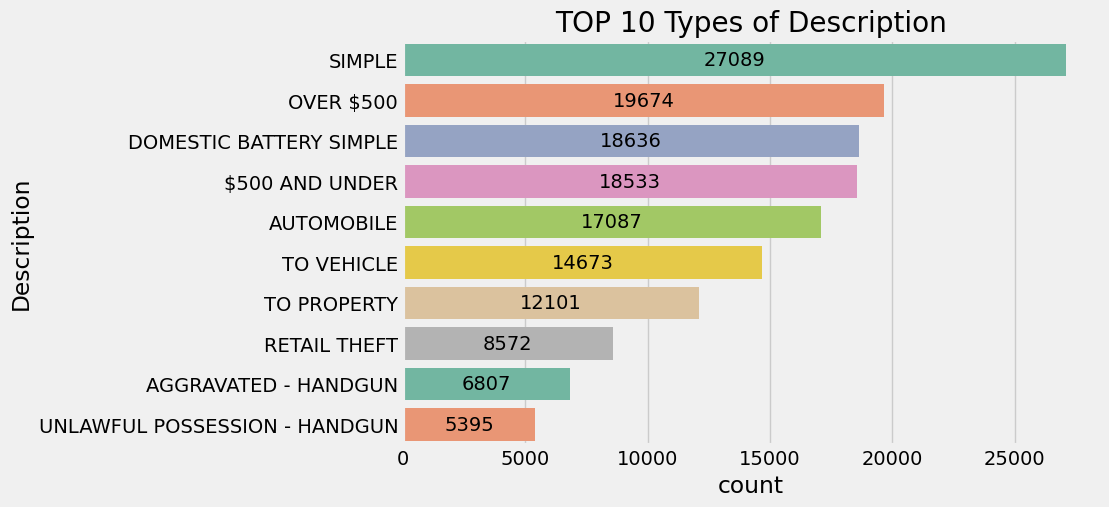

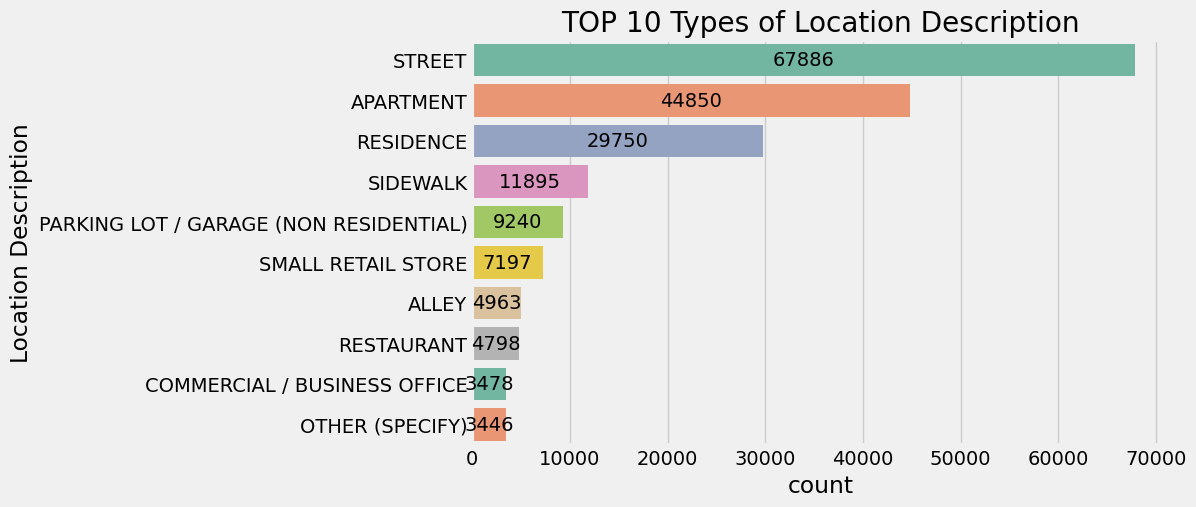

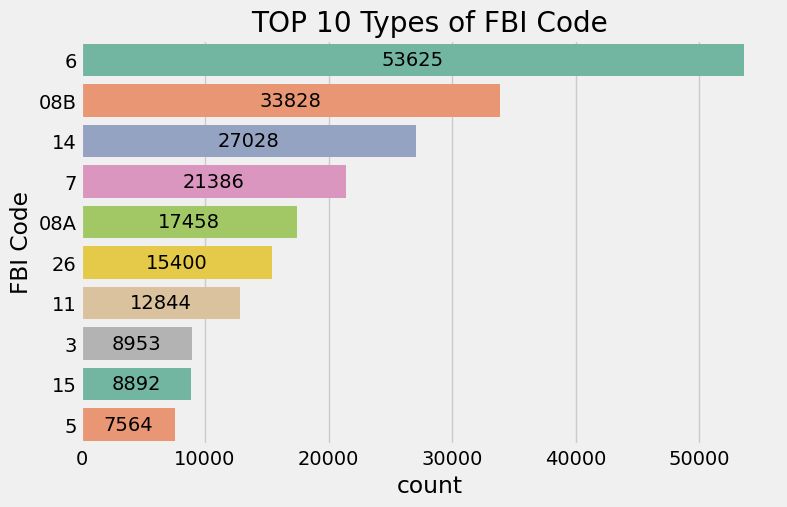

In [ ]:
for col in cat_cols :
  if col not in ['Domestic','Arrest','Is_Weekend','Time_of_Day','Day_of_Week','Month_of_year','Time_of_Day']:
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(8,5))
    count_prim = df[col].value_counts().head(10)
    ax = sns.barplot(y=count_prim.index, x=count_prim.values, palette="Set2")
    plt.title("TOP 10 Types of " + col)
    plt.ylabel(col)
    plt.xlabel("count")

    for p in ax.patches:
      width = p.get_width()
      ax.text(width / 2,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="center",
            va="center")

    plt.show()

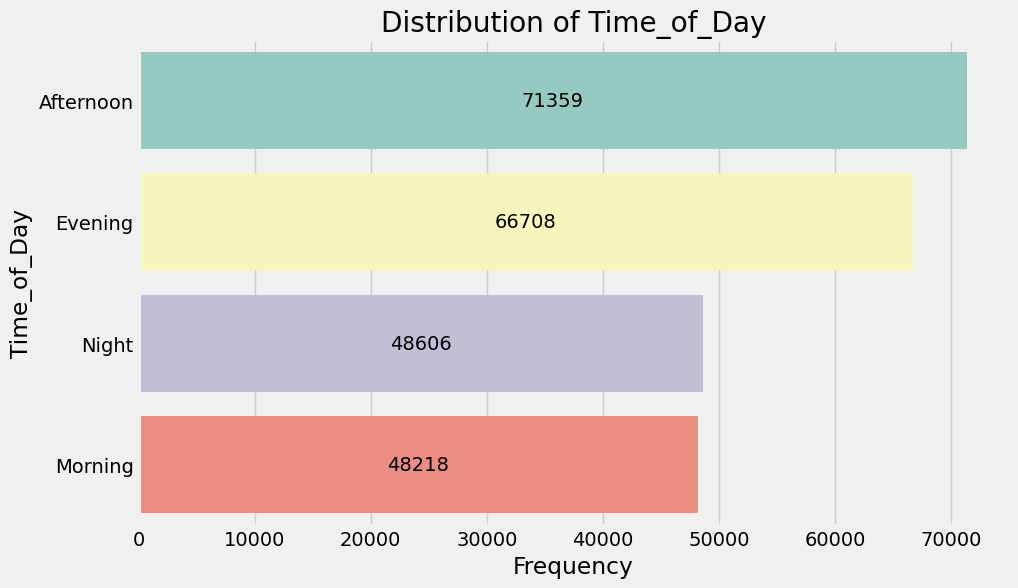

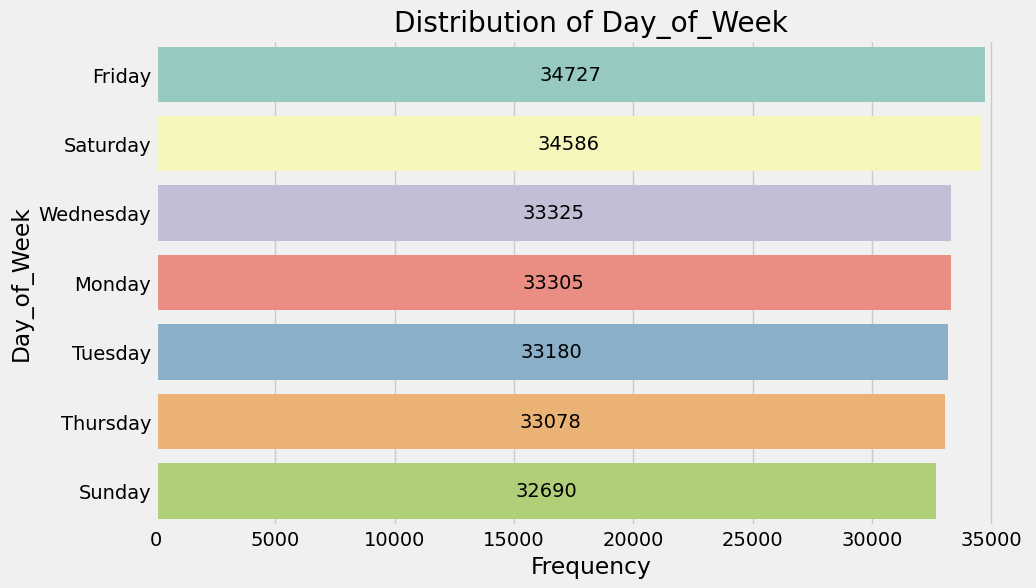

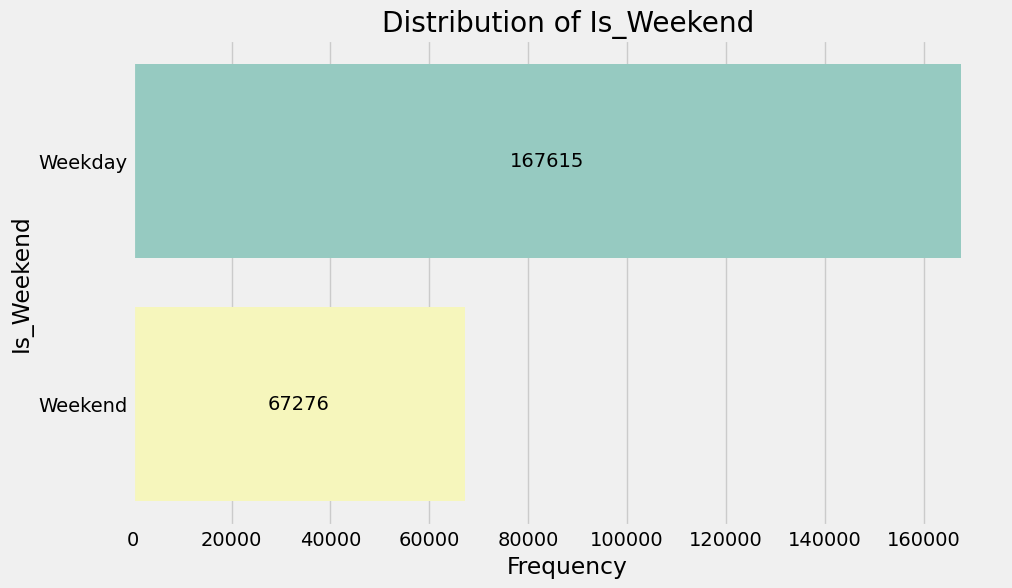

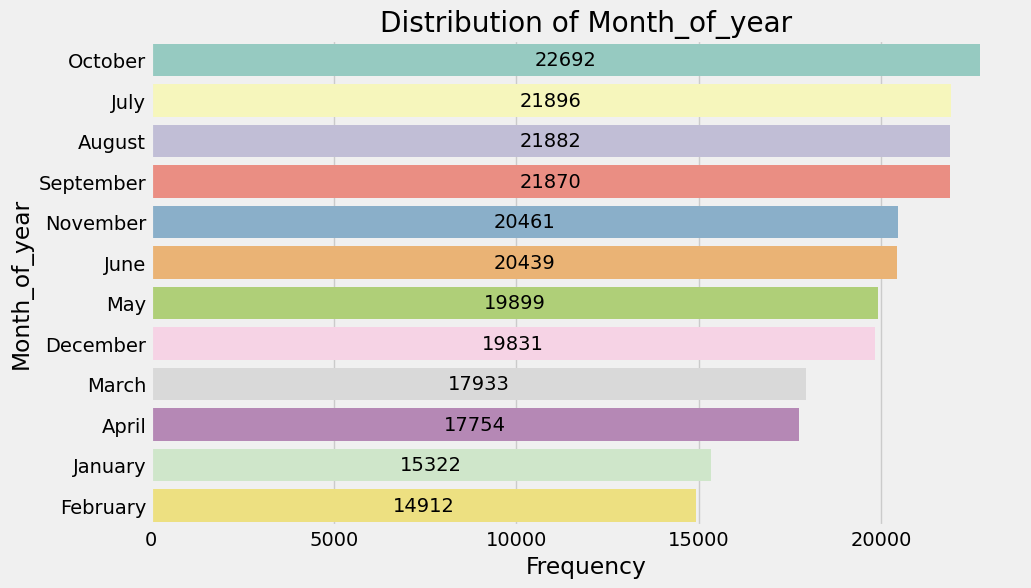

In [ ]:
for col in cat_cols :
  if col in ['Is_Weekend','Time_of_Day','Day_of_Week','Month_of_year','Time_of_Day']:
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(10,6))
    count_prim = df[col].value_counts()
    ax = sns.barplot(y=count_prim.index, x=count_prim.values, palette="Set3")
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.xlabel('Frequency')

    for p in ax.patches:
      width = p.get_width()
      ax.text(width / 2,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="center",
            va="center")

    plt.show()

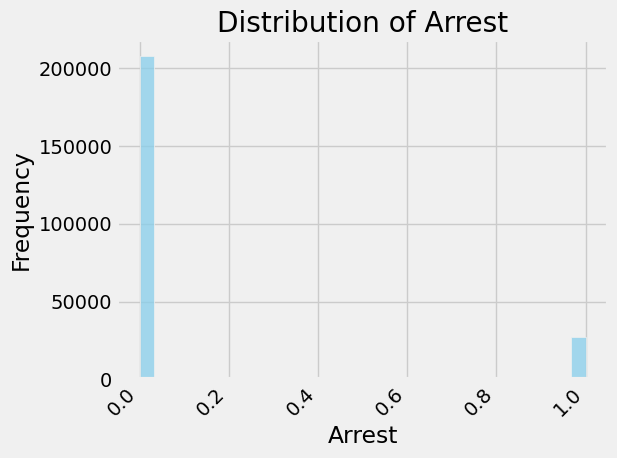

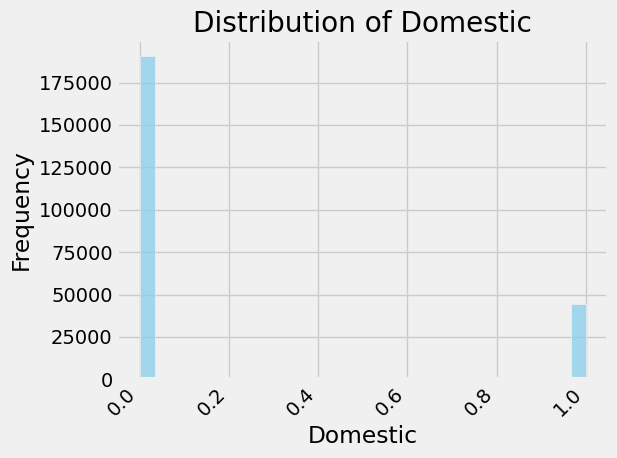

In [ ]:
for col in cat_cols:
  if col in ['Domestic','Arrest']:
    sns.histplot(df[col], bins=30, kde=False, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

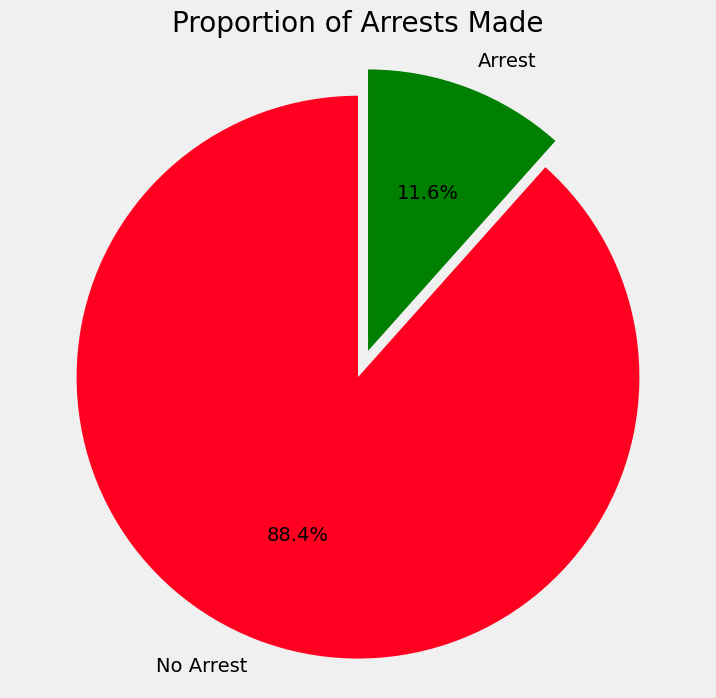

In [ ]:
arrest_counts = df['Arrest'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(arrest_counts, labels=['No Arrest', 'Arrest'], autopct='%1.1f%%', startangle=90 ,colors=['#FF0020', '#008000FF'] , explode=(0,0.1))
plt.title('Proportion of Arrests Made')
plt.axis('equal')
plt.show()

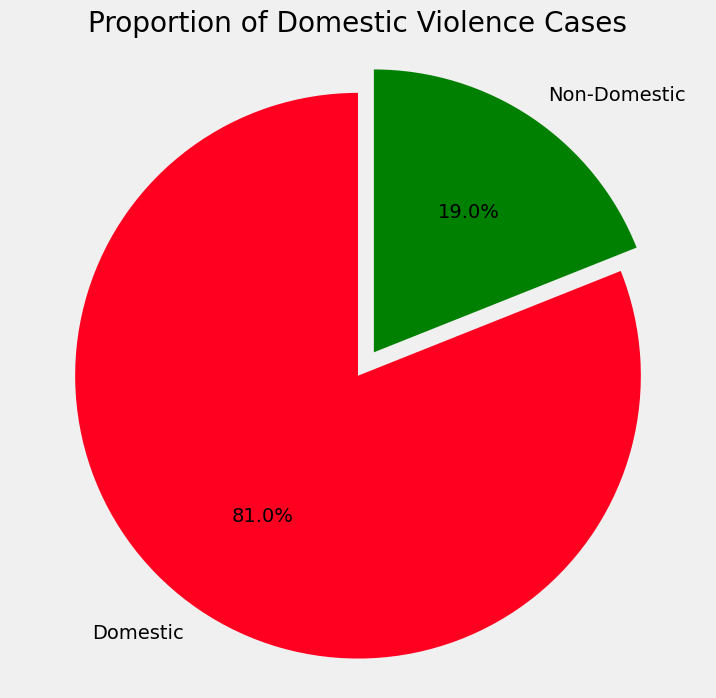

In [ ]:
delomestic_counts = df['Domestic'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(delomestic_counts, labels=['Domestic', 'Non-Domestic'], autopct='%1.1f%%', startangle=90 ,colors=['#FF0020', '#008000FF'] , explode=(0,0.1))
plt.title('Proportion of Domestic Violence Cases')
plt.axis('equal')
plt.show()

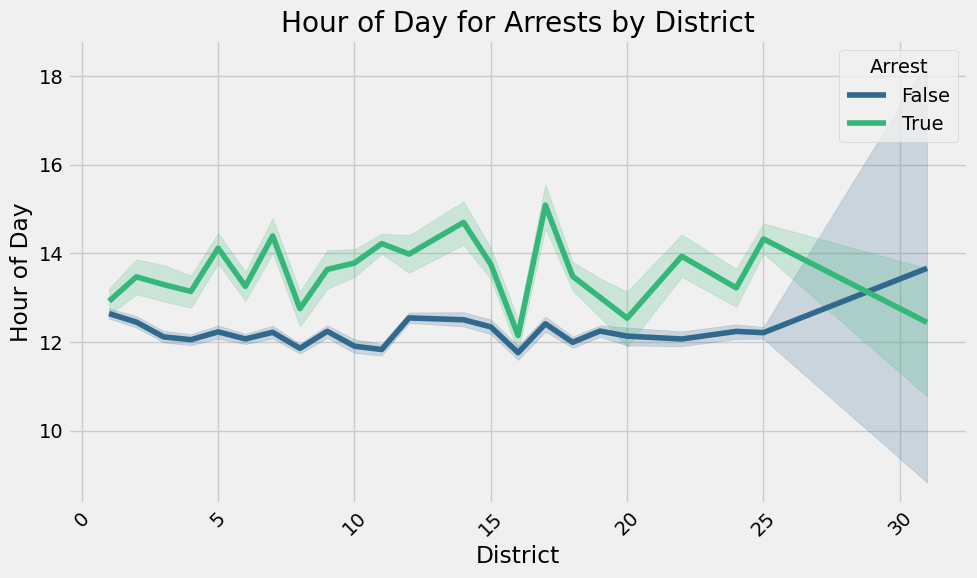

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='District', y='Hour_of_Day', palette='viridis', hue='Arrest')
plt.title('Hour of Day for Arrests by District')
plt.xlabel('District')
plt.ylabel('Hour of Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

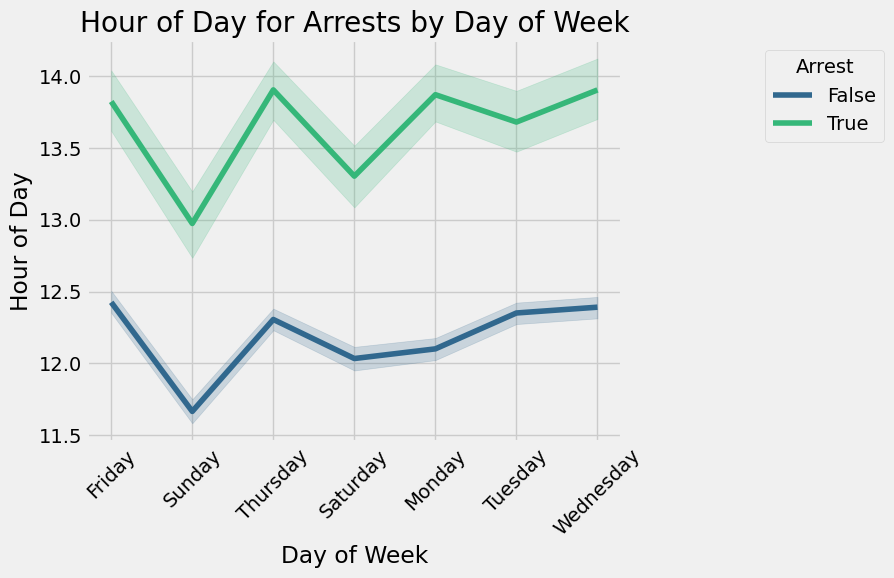

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Day_of_Week', y='Hour_of_Day', palette='viridis', hue='Arrest')
plt.title('Hour of Day for Arrests by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.legend(title='Arrest', bbox_to_anchor=(1.25, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

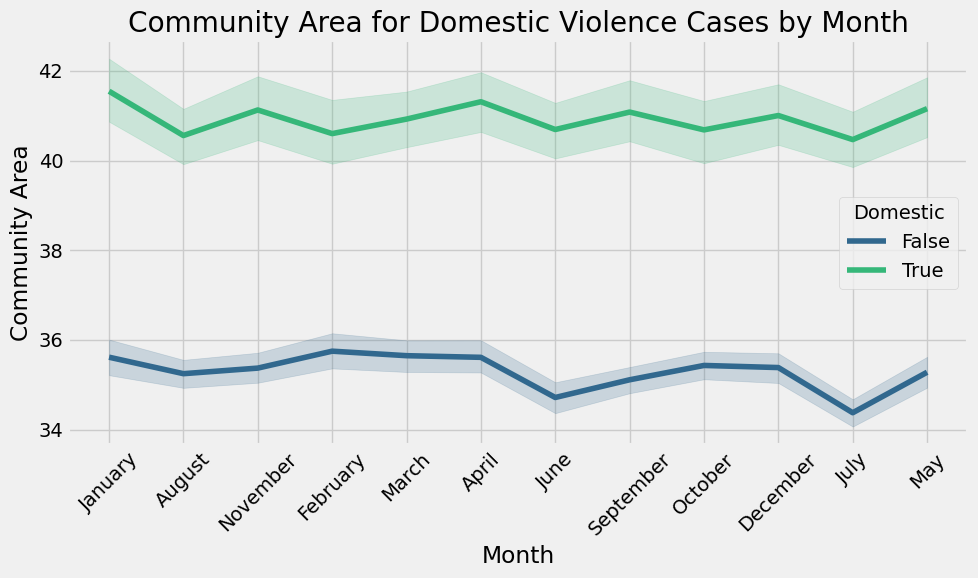

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month_of_year', y='Community Area', palette='viridis', hue='Domestic')
plt.title('Community Area for Domestic Violence Cases by Month')
plt.xlabel('Month')
plt.ylabel('Community Area')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

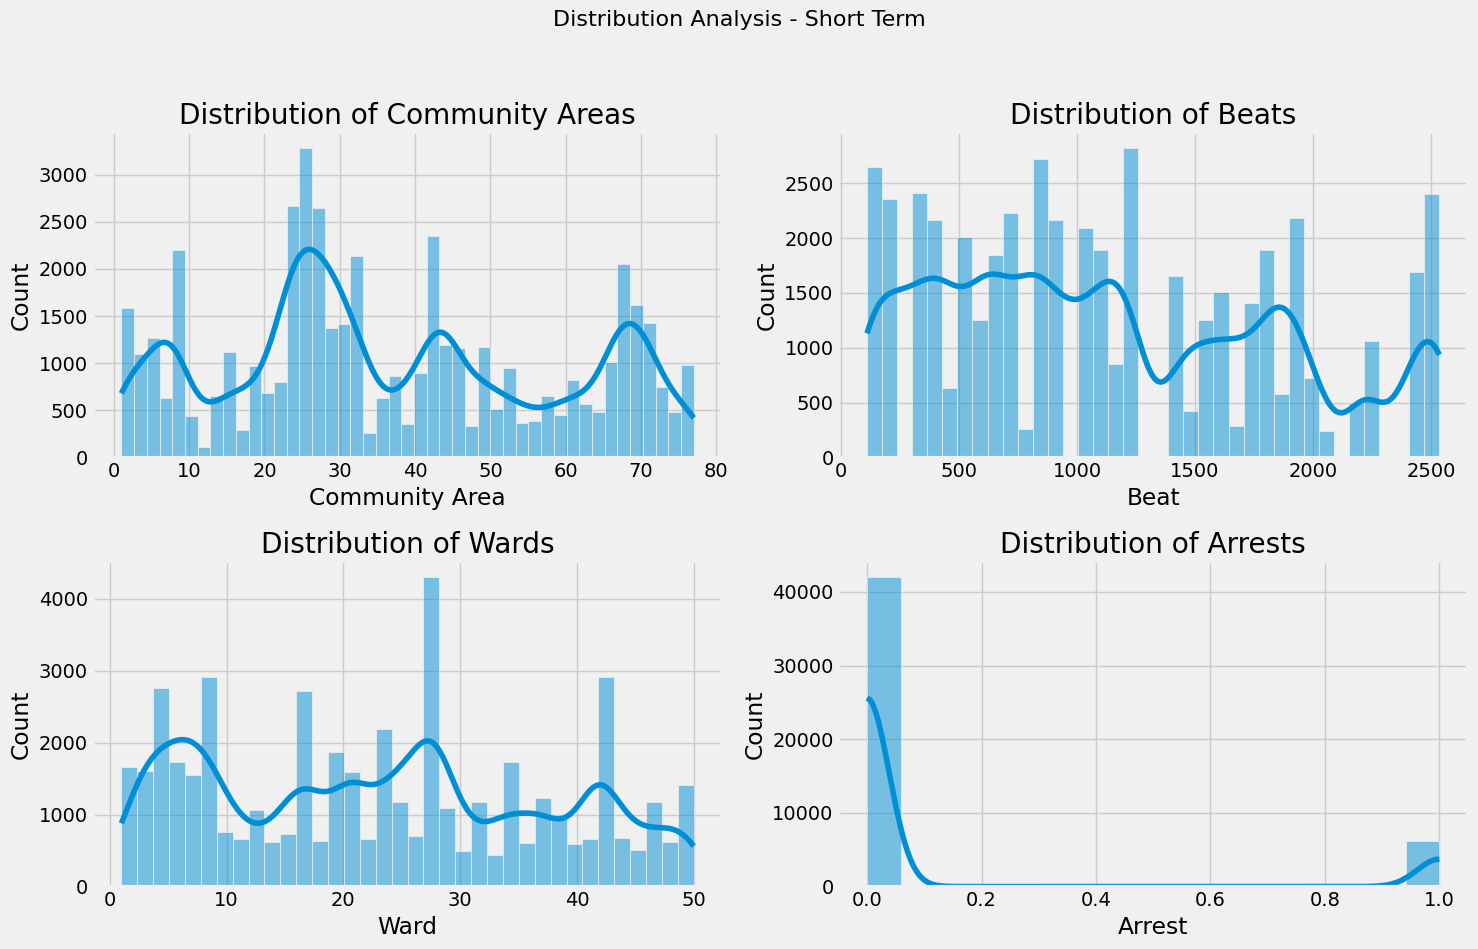

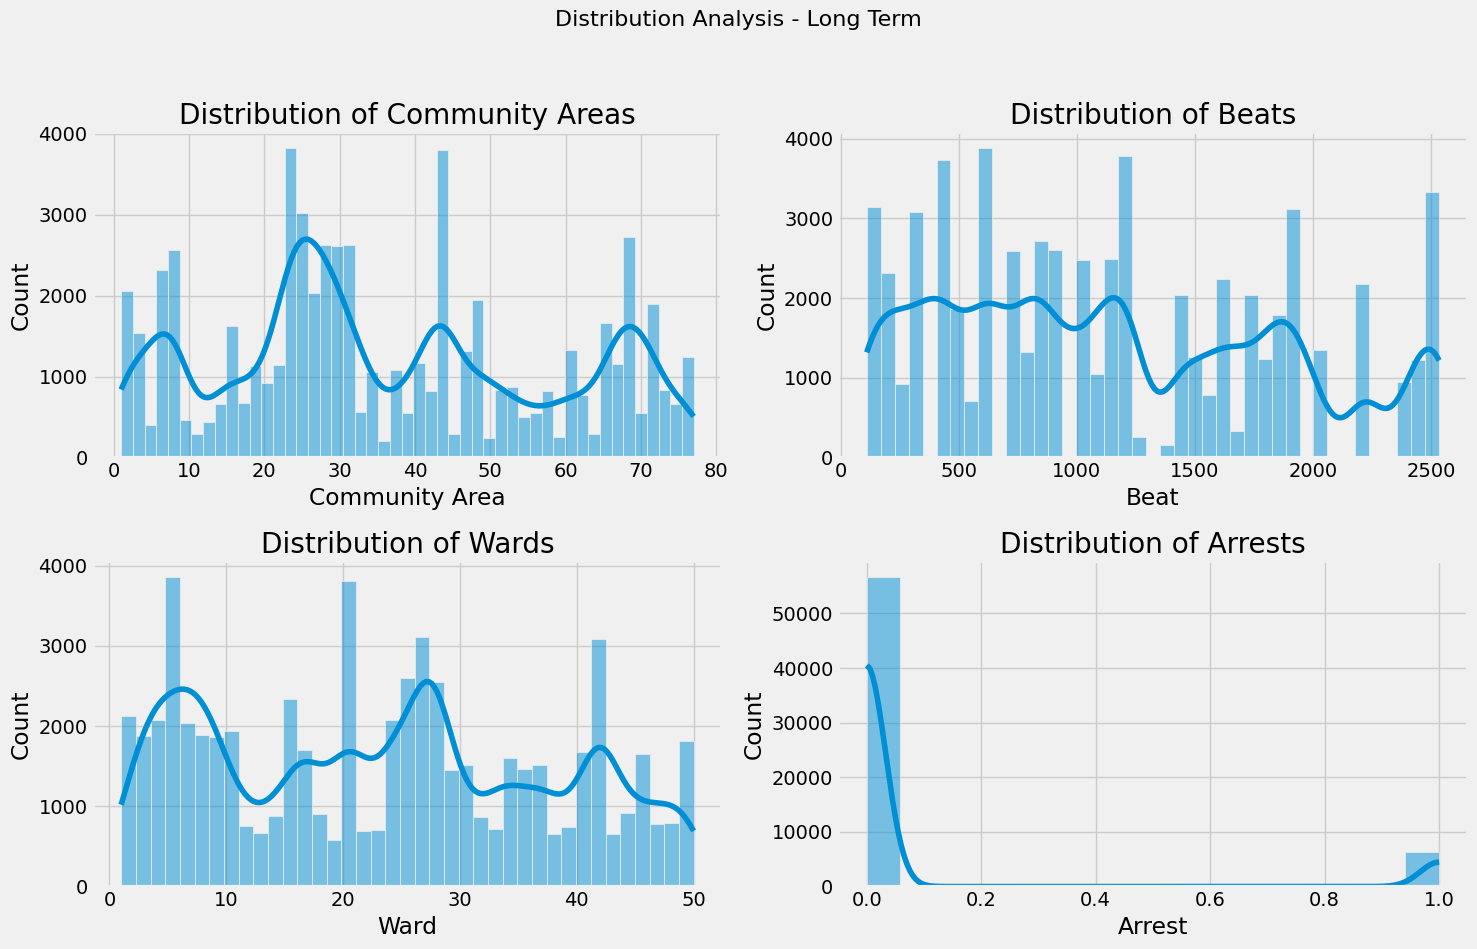

In [ ]:
def create_distribution_plots(data, timeframe):

    plt.figure(figsize=(15, 10))
    plt.suptitle(f'Distribution Analysis - {timeframe}', fontsize=16)

    plt.subplot(2, 2, 1)

    sns.histplot(data['Community Area'], kde=True)
    plt.title('Distribution of Community Areas')

    plt.subplot(2, 2, 2)
    sns.histplot(data['Beat'], kde=True)
    plt.title('Distribution of Beats')

    plt.subplot(2, 2, 3)
    sns.histplot(data['Ward'], kde=True)
    plt.title('Distribution of Wards')

    plt.subplot(2, 2, 4)
    sns.histplot(data['Arrest'], kde=True)
    plt.title('Distribution of Arrests')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

short_term_data = df[df['Month_of_year'].isin(['January', 'February', 'March'])]
long_term_data = df[df['Month_of_year'].isin(['October', 'November', 'December'])]

create_distribution_plots(short_term_data, 'Short Term')
create_distribution_plots(long_term_data, 'Long Term')


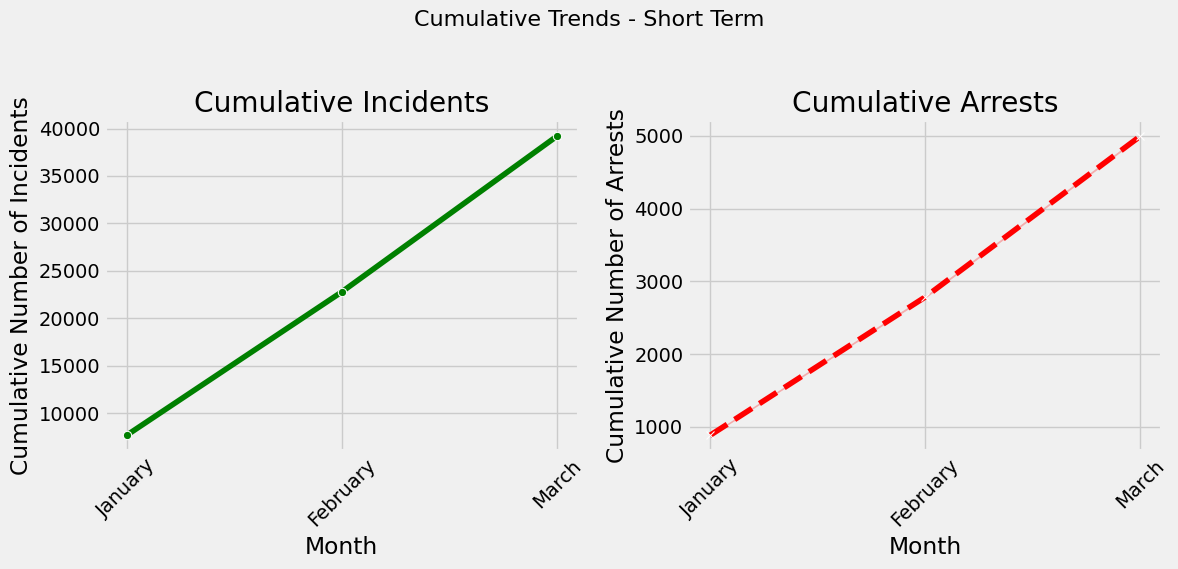

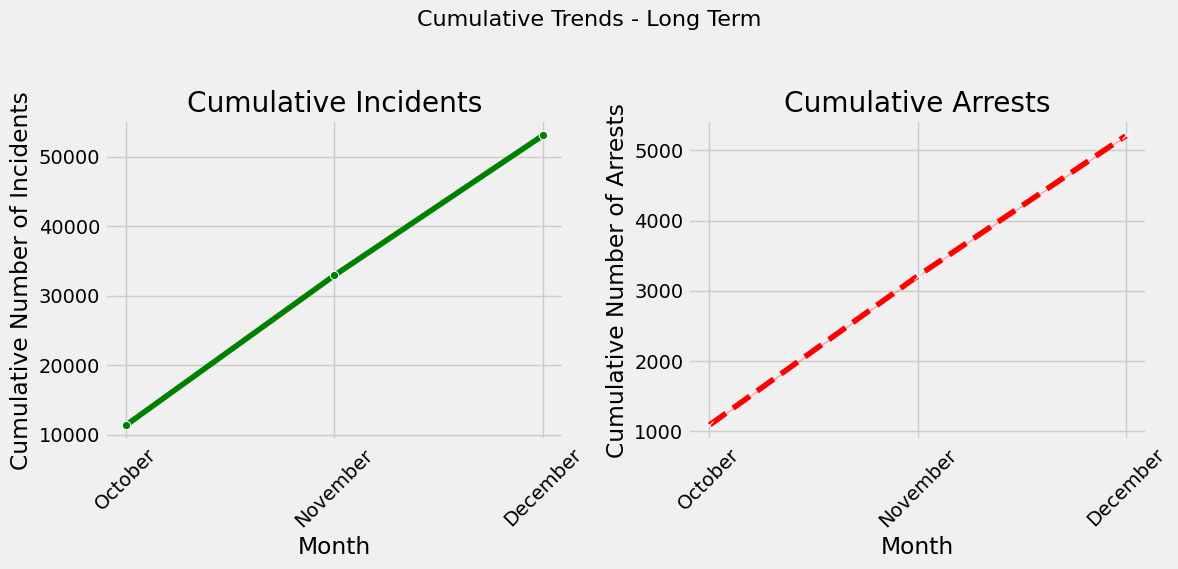

In [ ]:
def create_cumulative_plots(data, timeframe, time_col='Month_of_year'):
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    data[time_col] = pd.Categorical(data[time_col], categories=month_order, ordered=True)

    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Cumulative Trends - {timeframe}', fontsize=16)
    plt.subplot(1, 2, 1)

    data['Incident_Count'] = 1
    cumulative_incidents = data.sort_values(by=time_col)['Incident_Count'].cumsum()
    sns.lineplot(x=data[time_col], y=cumulative_incidents, marker='o', linestyle='-', color='green')
    plt.title('Cumulative Incidents')
    plt.xlabel('Month')
    plt.ylabel('Cumulative Number of Incidents')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    data['Arrest_Count'] = data['Arrest'].astype(int)
    cumulative_arrests = data.sort_values(by=time_col)['Arrest_Count'].cumsum()
    sns.lineplot(x=data[time_col], y=cumulative_arrests, marker='x', linestyle='--', color='red')
    plt.title('Cumulative Arrests')
    plt.xlabel('Month')
    plt.ylabel('Cumulative Number of Arrests')
    plt.xticks(rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

short_term_data = df[df['Month_of_year'].isin(['January', 'February', 'March'])]
long_term_data = df[df['Month_of_year'].isin(['October', 'November', 'December'])]

create_cumulative_plots(short_term_data, 'Short Term')
create_cumulative_plots(long_term_data, 'Long Term')

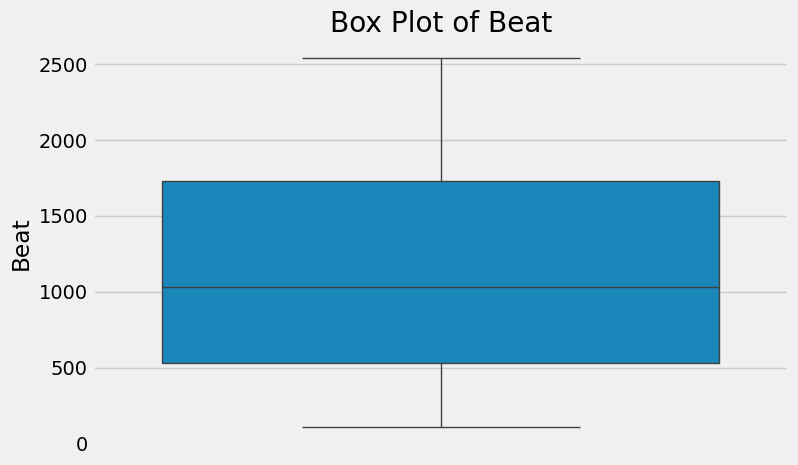

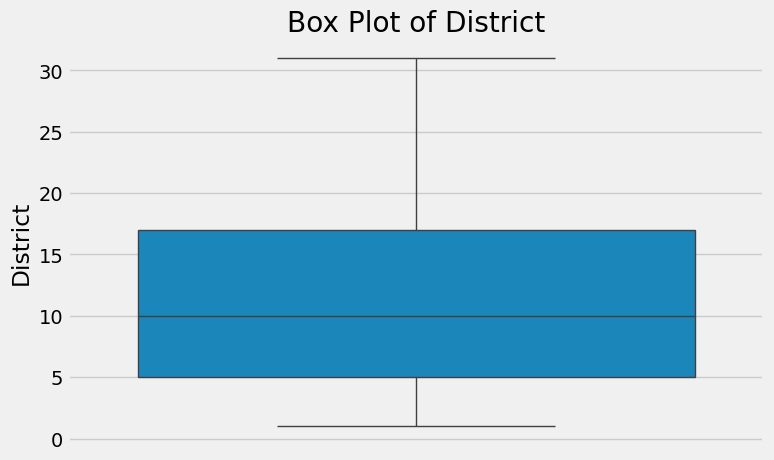

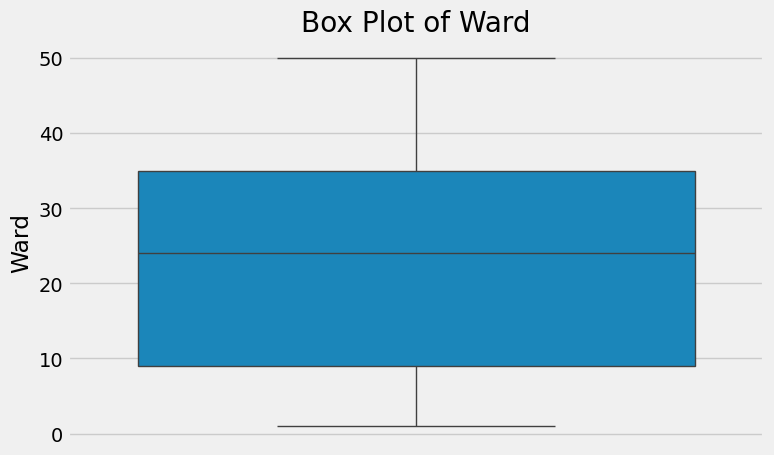

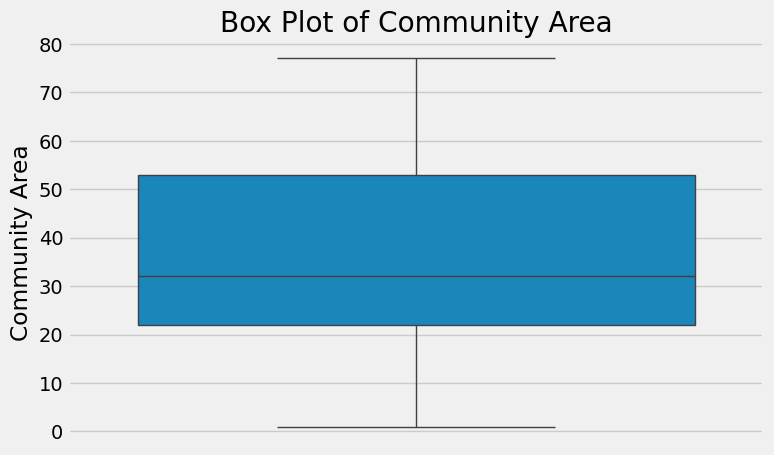

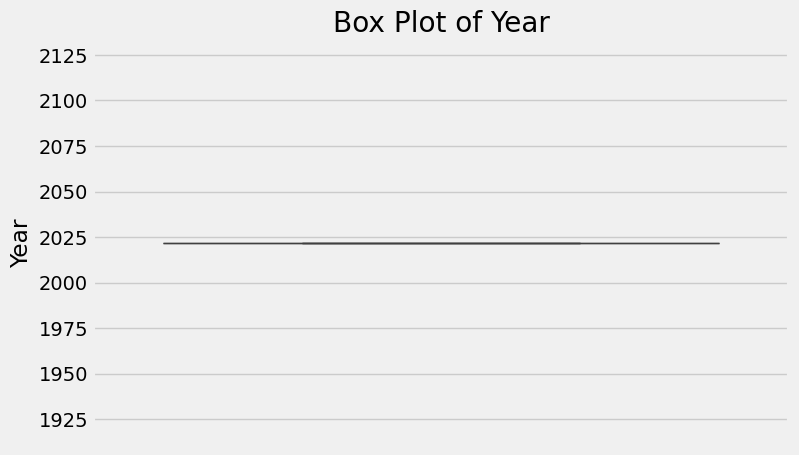

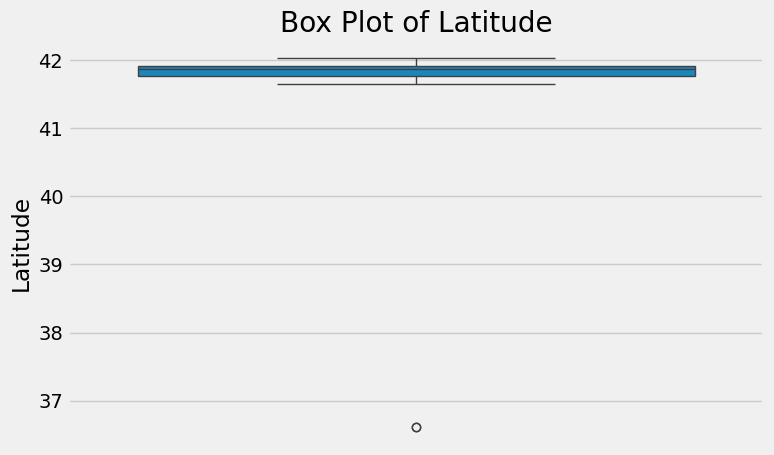

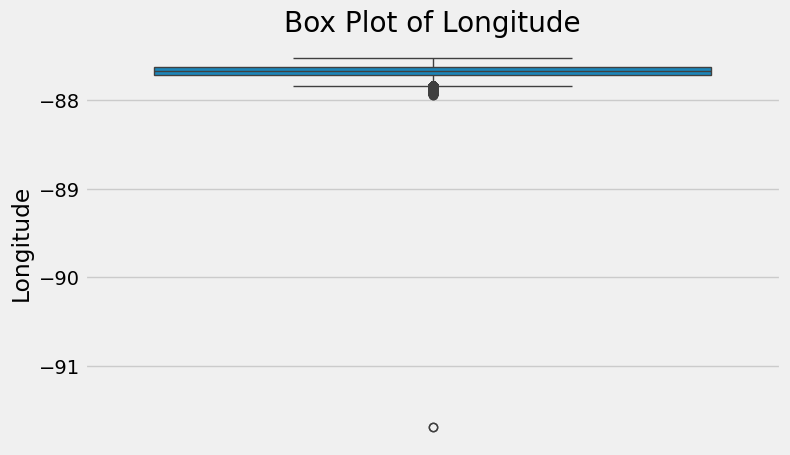

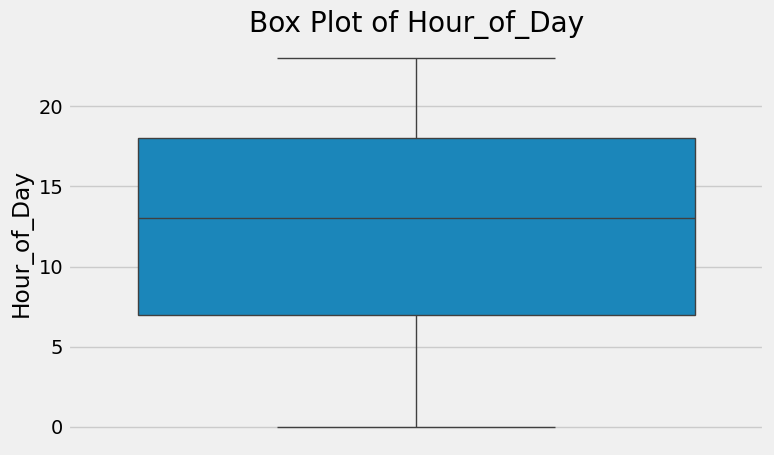

In [ ]:
for col in num_cols:
  plt.figure(figsize=(8, 5))
  sns.boxplot(df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

In [ ]:
df.drop(columns=['Latitude', 'Longitude'], inplace=True)

In [ ]:
label_cols=['Arrest','Domestic','Is_Weekend','Block','IUCR','Primary Type','Description','Location Description']
le=LabelEncoder()
for col in label_cols:
  df[col]=le.fit_transform(df[col])

In [ ]:
hot_cols=['Month_of_year','Time_of_Day','Day_of_Week']
df = pd.get_dummies(df, columns=hot_cols, dtype=int)

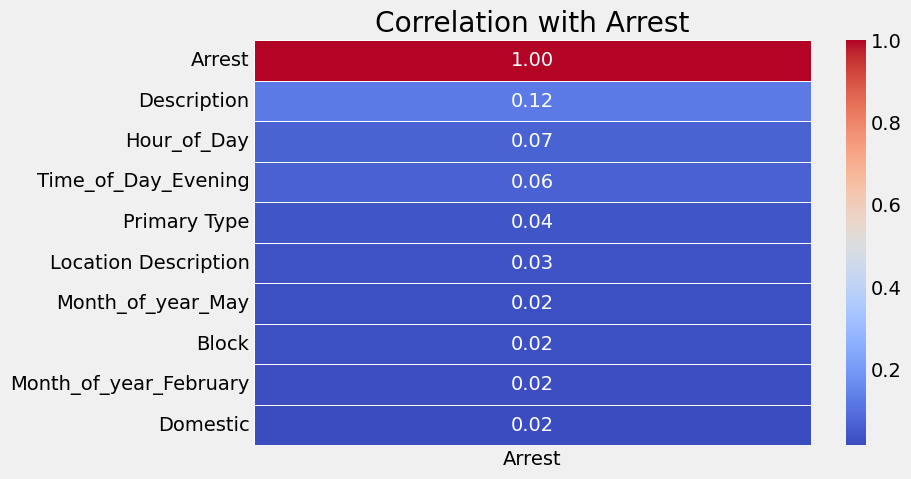

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
correlation_arrest = correlation_matrix['Arrest'].sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_arrest.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation with Arrest')
plt.show()

In [ ]:
top_correlated_columns = correlation_matrix['Arrest'].sort_values(ascending=False).head(10).index
X_selected = df[top_correlated_columns.drop('Arrest', errors='ignore')]
Y=df['Arrest']

In [ ]:
smote = SMOTE(sampling_strategy=0.75,random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, Y)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_selected , Y , test_size=0.25 , random_state=42)

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
model2 = DecisionTreeClassifier()
model2.fit(X_train , y_train)
model3 = RandomForestClassifier(n_estimators=200, random_state=57)
model3.fit(X_train , y_train)
model4 = SVC()
model4.fit(X_train , y_train)
model5 = KNeighborsClassifier()
model5.fit(X_train , y_train)

KNeighborsClassifier()

In [ ]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)

In [ ]:
def evaluate_model(y_test, y_pred):
    model.score(X_train, y_train)
    accuracy_score
    classification_report
    confusion_matrix = evaluate_model(y_test, y_pred)

Model: LogisticRegression
Accuracy: 0.8837423156173901
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     51896
           1       0.00      0.00      0.00      6827

    accuracy                           0.88     58723
   macro avg       0.44      0.50      0.47     58723
weighted avg       0.78      0.88      0.83     58723

Confusion Matrix:



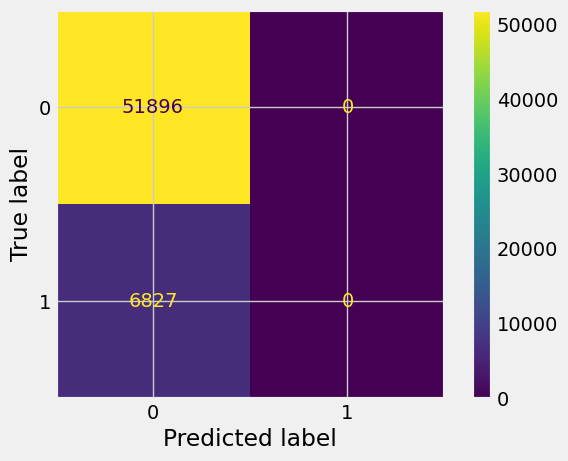

Model: DecisionTreeClassifier
Accuracy: 0.8861945064114571
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     51896
           1       0.51      0.51      0.51      6827

    accuracy                           0.89     58723
   macro avg       0.72      0.72      0.72     58723
weighted avg       0.89      0.89      0.89     58723

Confusion Matrix:



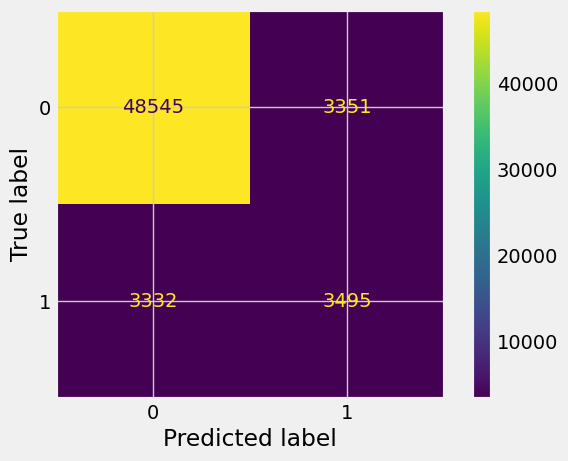

Model: RandomForestClassifier
Accuracy: 0.9173407353166562
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     51896
           1       0.71      0.48      0.58      6827

    accuracy                           0.92     58723
   macro avg       0.82      0.73      0.76     58723
weighted avg       0.91      0.92      0.91     58723

Confusion Matrix:



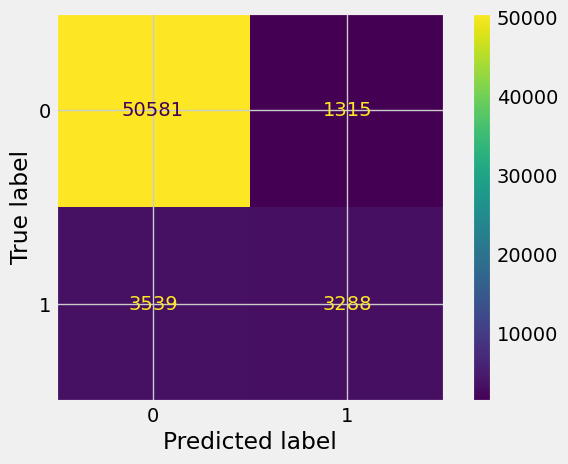

Model: SVC
Accuracy: 0.8837423156173901
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     51896
           1       0.00      0.00      0.00      6827

    accuracy                           0.88     58723
   macro avg       0.44      0.50      0.47     58723
weighted avg       0.78      0.88      0.83     58723

Confusion Matrix:



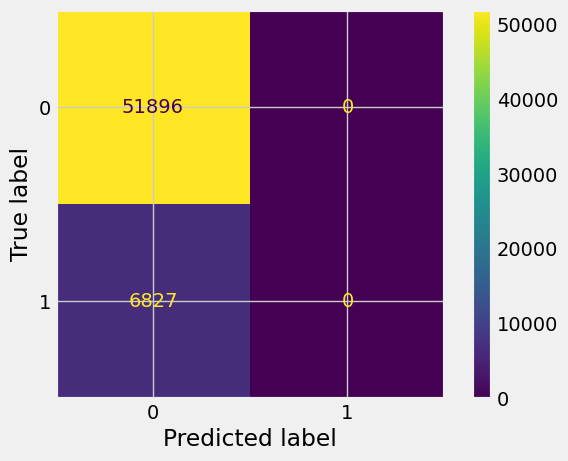

Model: KNeighborsClassifier
Accuracy: 0.9135432454063995
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     51896
           1       0.74      0.40      0.52      6827

    accuracy                           0.91     58723
   macro avg       0.83      0.69      0.73     58723
weighted avg       0.90      0.91      0.90     58723

Confusion Matrix:



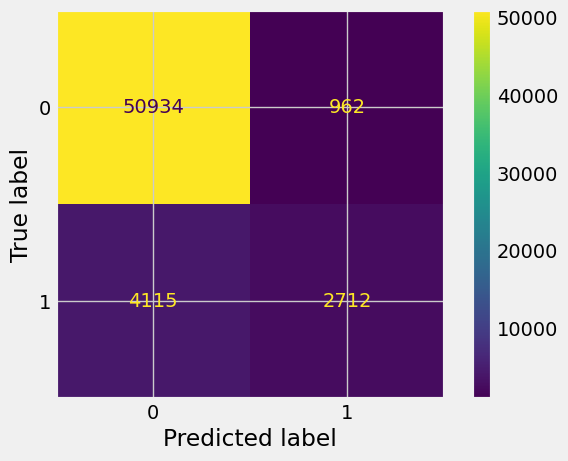

,Model,Accuracy Score %
0,LogisticRegression,88.4
1,DecisionTreeClassifier,88.6
2,RandomForestClassifier,91.7
3,SVC,88.4
4,KNeighborsClassifier,91.4


In [ ]:
results = []
for model in [model1, model2, model3, model4, model5]:
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=[0, 1])
    cm_display.plot()
    plt.show()
    results.append({
        'Model': model.__class__.__name__,
        'Accuracy Score %': round(accuracy_score(y_test, y_pred) * 100, 1),
    })

results_df = pd.DataFrame(results)
display(results_df)